In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/crawled_data/clean_flight.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Airline(s),Origin,Destination,Depart Hour,Depart Min,Travel Hours,Price (VND)
0,VietJet Air,SGN,HAN,10.0,45.0,2.166667,1913010
1,VietJet Air,SGN,HAN,10.0,45.0,2.166667,1913010
2,VietJet Air,SGN,HAN,10.0,50.0,2.166667,1913010
3,VietJet Air,SGN,HAN,9.0,45.0,2.166667,2189902
4,VietJet Air,SGN,HAN,6.0,45.0,2.166667,1971662


# Data analysis

### Số lượng chuyến bay của từng hãng là bao nhiêu?

Text(0.5, 1.0, 'Airline')

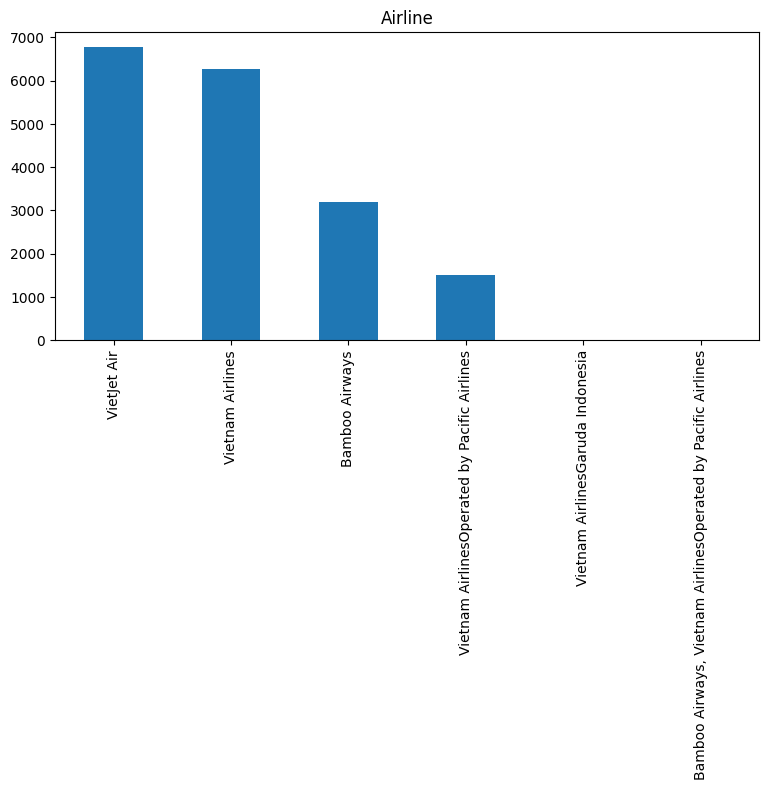

In [4]:
plt.figure(figsize=(20, 4))
plt.subplot(121)
df['Airline(s)'].value_counts().plot(kind='bar')
plt.title('Airline')
# Đoạn code này sử dụng thư viện matplotlib để vẽ một biểu đồ cột (bar chart) để đếm số lần xuất hiện của các hãng hàng không (Airline(s)) trong dữ liệu.
# plt.figure(figsize=(20, 4)): tạo một figure với kích thước là 20x4 inch.
# plt.subplot(121): tạo một subplot trong figure với số lượng hàng=1, số lượng cột=2 và chọn subplot thứ nhất (vị trí 1).
# df['Airline(s)'].value_counts().plot(kind='bar'): đếm số lần xuất hiện của từng giá trị trong cột 'Airline(s)' và vẽ biểu đồ cột (bar chart) cho kết quả.
# plt.title('Airline'): đặt tiêu đề cho subplot là 'Airline'.

In [ ]:
df['Airline(s)'].value_counts()
# đếm số lần xuất hiện của từng giá trị trong cột 'Airline(s)' và trả về một Series với các giá trị đã được sắp xếp giảm dần theo số lần xuất hiện

VietJet Air                                                     6786
Vietnam Airlines                                                6277
Bamboo Airways                                                  3199
Vietnam AirlinesOperated by Pacific Airlines                    1498
Vietnam AirlinesGaruda Indonesia                                   1
Bamboo Airways, Vietnam AirlinesOperated by Pacific Airlines       1
Name: Airline(s), dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'VietJet Air'),
  Text(1, 0, 'Bamboo Airways'),
  Text(2, 0, 'Vietnam AirlinesOperated by Pacific Airlines'),
  Text(3, 0, 'Vietnam Airlines'),
  Text(4, 0, 'Vietnam AirlinesGaruda Indonesia'),
  Text(5, 0, 'Bamboo Airways, Vietnam AirlinesOperated by Pacific Airlines')])

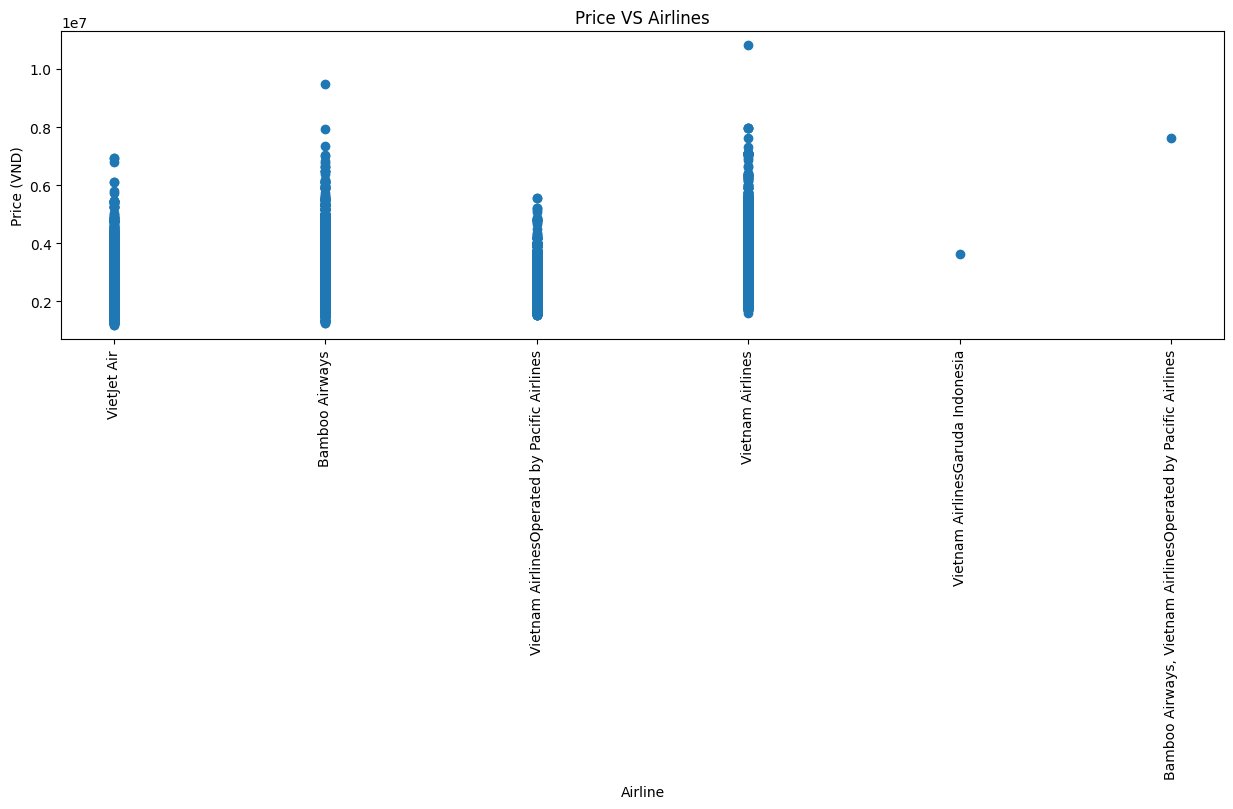

In [ ]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df['Airline(s)'], df['Price (VND)'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price (VND)')
plt.xticks(rotation = 90)
# sử dụng thư viện matplotlib để vẽ một biểu đồ scatter plot để so sánh giá vé (Price) giữa các hãng hàng không (Airline(s)) trong dữ liệu

### Giá vé trung bình của mỗi hãng bay là bao nhiêu?

In [ ]:
X_agg = df.groupby('Airline(s)', as_index=False).agg({'Price (VND)':['count', 'sum']})
X_agg
# nhóm các giá trị trong cột 'Airline(s)' của df
# sau đó tính tổng số lượng vé (count) và tổng giá trị của các vé (sum) cho mỗi hãng hàng không dựa trên cột 'Price (VND)' 

Airline(s) Price (VND)             
                                                           count          sum
0                                     Bamboo Airways        3199   9581633512
1  Bamboo Airways, Vietnam AirlinesOperated by Pa...           1      7611120
2                                        VietJet Air        6786  15420587424
3                                   Vietnam Airlines        6277  20022476540
4                   Vietnam AirlinesGaruda Indonesia           1      3620056
5       Vietnam AirlinesOperated by Pacific Airlines        1498   4421264144

In [ ]:
X_agg['Price (VND)']['sum']
# truy cập cột 'Price (VND)' trong  X_agg và lấy ra cột 'sum'. 
# Nó trả về một pandas Series chứa tổng giá trị của các vé của từng hãng hàng không.

0     9581633512
1        7611120
2    15420587424
3    20022476540
4        3620056
5     4421264144
Name: sum, dtype: int64

In [ ]:
X_agg['Average Price'] = X_agg['Price (VND)']['sum']/X_agg['Price (VND)']['count']
# tính trung bình giá vé của từng hãng hàng không và lưu vào cột 'Average Price' trong X_agg

In [ ]:
X_agg

Airline(s) Price (VND)               \
                                                           count          sum   
0                                     Bamboo Airways        3199   9581633512   
1  Bamboo Airways, Vietnam AirlinesOperated by Pa...           1      7611120   
2                                        VietJet Air        6786  15420587424   
3                                   Vietnam Airlines        6277  20022476540   
4                   Vietnam AirlinesGaruda Indonesia           1      3620056   
5       Vietnam AirlinesOperated by Pacific Airlines        1498   4421264144   

  Average Price  
                 
0  2.995196e+06  
1  7.611120e+06  
2  2.272412e+06  
3  3.189816e+06  
4  3.620056e+06  
5  2.951445e+06

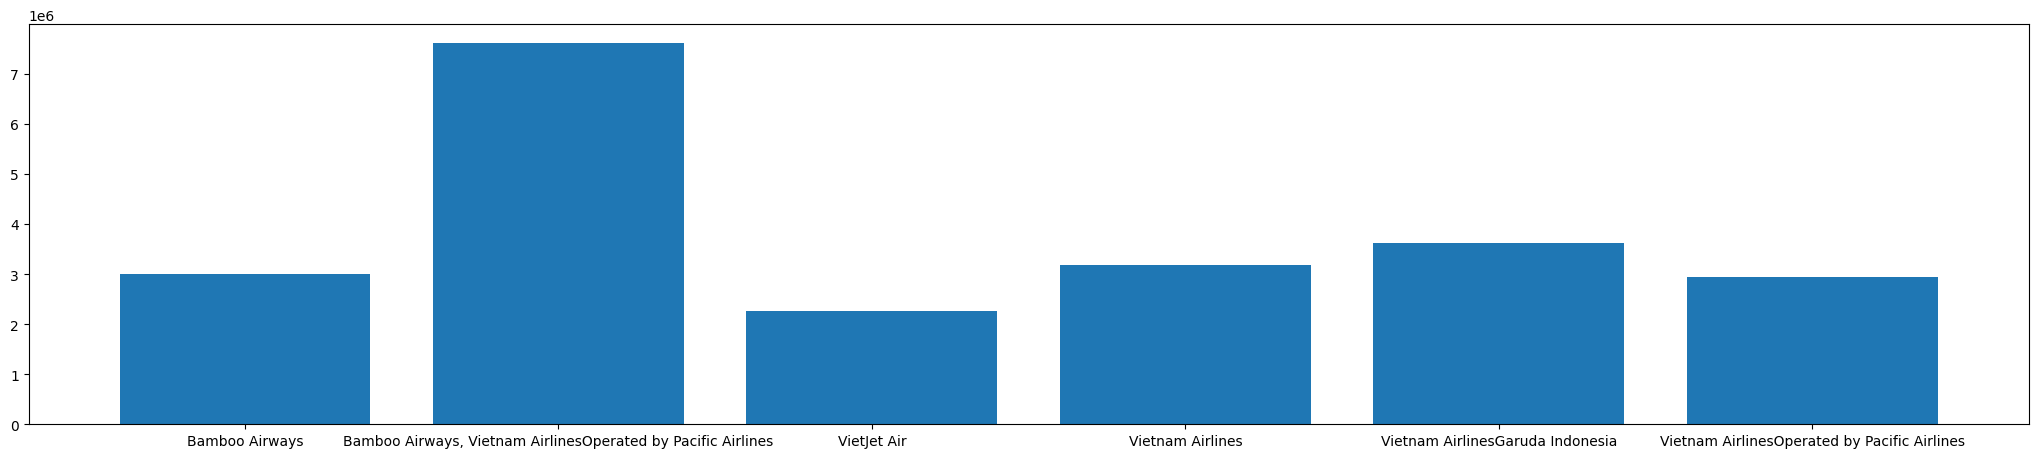

In [ ]:
fig = plt.figure(figsize=(20, 4))
ax = fig.add_axes([0,0,1,1])
ax.bar(X_agg['Airline(s)'],X_agg['Average Price'])
plt.show()
# vẽ biểu đồ cột của trung bình giá vé của từng hãng hàng không
# với trục x là tên hãng hàng không và trục y là giá trị trung bình của từng hãng

### Phân tích theo điểm đi - điểm đến

In [ ]:
# tạo ra một dataframe mới gom nhóm các giá trị theo cặp Origin và Destination và tính toán số lượng và tổng giá tiền của các chuyến bay trong từng cặp này.
agg_source_dest = df.groupby(['Origin', 'Destination'], as_index=False).agg({'Price (VND)':['count', 'sum']})
# Tạo thêm một cột mới tên Origin-Destination chứa thông tin về cặp Origin và Destination được nối bằng dấu "-"
agg_source_dest['Origin-Destination'] = agg_source_dest['Origin'] + ' - ' + agg_source_dest['Destination']
# Tạo thêm một cột mới tên Count chứa thông tin về số lượng chuyến bay Price (VND)(count)
agg_source_dest['Count'] = agg_source_dest['Price (VND)']['count']
# Tạo thêm một cột mới tên Average Price chứa thông tin về giá trung bình của các chuyến bay trong từng cặp Origin và Destination.
agg_source_dest['Average Price'] = agg_source_dest['Price (VND)']['sum']/agg_source_dest['Price (VND)']['count']
# Xóa bỏ các cột không cần thiết là Origin và Destination, và cột dữ liệu Price (VND)
agg_source_dest = agg_source_dest.drop(['Origin', 'Destination', 'Price (VND)'], axis=1)

<ipython-input-83-a17670582a32>:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  agg_source_dest = agg_source_dest.drop(['Origin', 'Destination', 'Price (VND)'], axis=1)


In [ ]:
agg_source_dest

,Origin-Destination,Count,Average Price
,,,
0,CXR - DAD,29,3.265957e+06
1,CXR - HAN,381,3.136557e+06
2,CXR - HPH,39,2.835721e+06
3,CXR - SGN,276,2.142891e+06
4,CXR - VII,19,2.921580e+06
...,...,...,...
58,VII - CXR,11,3.283892e+06
59,VII - DLI,31,1.922030e+06
60,VII - PQC,16,1.905295e+06


#### có bao nhiêu chuyến bay từ Sài Gòn đến Hà Nội?

In [ ]:
agg_source_dest.loc[agg_source_dest['Origin-Destination'] == 'SGN - HAN']
# trả về tất cả các dòng trong agg_source_dest có giá trị của cột Origin-Destination là 'SGN - HAN'

,Origin-Destination,Count,Average Price
,,,
44,SGN - HAN,1852,3.485232e+06


In [ ]:
# Có tổng 1852 chuyến bay từ Sài Gòn đến Hà Nội, giá vé trung bình 3.48 tr

#### Chuyến bay có giá vé trung bình đắt nhất là chuyến bay nào?

In [ ]:
agg_source_dest.loc[agg_source_dest['Average Price'].idxmax()]
# trả về hàng đầu tiên trong agg_source_dest có giá trung bình lớn nhất

Origin-Destination      UIH - HPH
Count                           1
Average Price           6120950.0
Name: 50, dtype: object

In [ ]:
# Chuyến bay có giá trung bình đắt nhất là từ Bình Định (sân bay Phù Cát) đến Hải Phòng (sân bay Cát Bi) với giá vé trung bình là 6.12 tr

#### Chuyến bay có giá vé trung bình rẻ nhất là chuyến bay nào?

In [ ]:
agg_source_dest.loc[agg_source_dest['Average Price'].idxmin()]

Origin-Destination      VCA - DLI
Count                           4
Average Price           1602188.5
Name: 53, dtype: object

In [ ]:
# Chuyến bay có giá trung bình rẻ nhất từ Cần Thơ (sân bay Cần Thơ) đến Lâm Đồng (sân bay Liên Khương) với giá vé trung bình là 1.6 tr

## Data preprocessing

In [21]:
x = df[['Depart Hour', 'Depart Min', 'Airline(s)', 'Origin', 'Destination', 'Travel Hours']]
y = df['Price (VND)']
# tạo ra 2 DataFrame x và y với các cột tương ứng

In [22]:
x['Airline(s)'] = LabelEncoder().fit_transform(x['Airline(s)'])
x['Origin'] = LabelEncoder().fit_transform(x['Origin'])
x['Destination'] = LabelEncoder().fit_transform(x['Destination'])
# sử dụng LabelEncoder từ thư viện sklearn.preprocessing để mã hóa các giá trị chuỗi trong cột Airline(s), Origin, và Destination thành các giá trị số nguyên

<ipython-input-22-f6877b0c8eb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Airline(s)'] = LabelEncoder().fit_transform(x['Airline(s)'])
<ipython-input-22-f6877b0c8eb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Origin'] = LabelEncoder().fit_transform(x['Origin'])
<ipython-input-22-f6877b0c8eb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.10)
# chia dữ liệu thành hai tập con: tập huấn luyện (train) (90%) và tập kiểm tra (test) (10%)

# Build and train model

### Sử dụng mô hình LinearRegression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
linearRegressionModel = LinearRegression()
 
linearRegressionModel.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred_lg = linearRegressionModel.predict(X_test)
# kiểm tra độ chính xác của mô hình

In [11]:
# Đoạn code dưới tính toán và in ra hai giá trị là Test RMSE và Test MAE dựa trên y_test và y_pred
print("Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred_lg)))
# RMSE (Root Mean Squared Error) là một phép đo sai số dự báo phổ biến, được tính bằng cách lấy căn bậc hai của trung bình tổng bình phương sai số giữa dự báo và giá trị thực tế
print("Test MAE: %.2f"
      % np.sqrt(mean_absolute_error(y_test, y_pred_lg)))
# MAE (Mean Absolute Error) là giá trị trung bình của độ lỗi tuyệt đối giữa giá trị dự báo và giá trị thực tế

Test RMSE: 757699.83
Test MAE: 768.46


### Sử sụng SVM Regressor

In [24]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

In [13]:
y_pred_svr = svr.predict(X_test)
# kiểm tra độ chính xác của mô hình

In [14]:
print("Test RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("Test MAE: %.2f" % np.sqrt(mean_absolute_error(y_test, y_pred_svr)))

Test RMSE: 892626.33
Test MAE: 826.43


### Sử dụng mô hình Neuron Network

In [15]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(10, 30, 50, 30, 10),
    alpha=0.001,
    random_state=20,
    early_stopping=False
)
nn.fit(X_train, y_train)
# Neuron Network train lâu hơn các mô hình trên ( train càng lâu nếu càng tăng số lượng hidden_layer_sizes)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.001, hidden_layer_sizes=(10, 30, 50, 30, 10),
             random_state=20)

In [16]:
y_pred_nn = nn.predict(X_test)
# kiểm tra độ chính xác của mô hình

In [17]:
print("Test RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_nn)))
print("Test MAE: %.2f" % np.sqrt(mean_absolute_error(y_test, y_pred_nn)))

Test RMSE: 892626.33
Test MAE: 826.43


### Sử dụng mô hình RandomForestRegressor

In [18]:
clf = RandomForestRegressor()  
clf.fit(X_train, y_train)
# Đoạn mã này đang tạo một RandomForestRegressor (một mô hình học máy sử dụng phương pháp RandomForest) 
# sau đó dùng nó để huấn luyện trên tập dữ liệu huấn luyện X_train và y_train. 
# Mô hình sẽ học cách ánh xạ từ các đặc trưng (thời gian bay, hãng hàng không, sân bay xuất phát và đích đến) 
# sang giá tiền của chuyến bay (Price (VND)), để sau đó có thể dự đoán giá tiền cho các chuyến bay mới.

RandomForestRegressor()

In [19]:
y_pred = clf.predict(X_test)
# kiểm tra độ chính xác của mô hình

In [20]:
print("Test RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test MAE: %.2f" % np.sqrt(mean_absolute_error(y_test, y_pred)))

Test RMSE: 892626.33
Test MAE: 826.43
